In [1]:
from keras.models import load_model
model = load_model('clothes_category_83%.h5')
model.summary()

Using TensorFlow backend.
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 11)                2827      
Total params: 2,100,235
Trainable params: 2,100,235
Non-trainable params: 0
_________________________________________________________________


In [15]:
import json
import pprint

model_json = model.to_json()
pprint.pprint(json.loads(model_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': [{'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'activity_regularizer': None,
                        'batch_input_shape': [None, 8192],
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {}},
                        'bias_regularizer': None,
                        'dtype': 'float32',
                        'kernel_constraint': None,
                        'kernel_initializer': {'class_name': 'VarianceScaling',
                                               'config': {'distribution': 'uniform',
                                                          'mode': 'fan_avg',
                                                          'scale': 1.0,
                                                          'seed': None}},
                        'kernel_regulari

In [20]:
from PIL import Image
import os, shutil

original_dataset_dir = './data/clothes_category/train'

base_dir = './data/clothes_category_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
# os.mkdir(test_dir)

train_Coat_dir = os.path.join(train_dir, 'Coat')
# os.mkdir(train_Coat_dir)

train_Cutoffs_dir = os.path.join(train_dir, 'Cutoffs')
# os.mkdir(train_Cutoffs_dir)

train_Hoodie_dir = os.path.join(train_dir, 'Hoodie')
# os.mkdir(train_Hoodie_dir)

train_Jacket_dir = os.path.join(train_dir, 'Jacket')
# os.mkdir(train_Jacket_dir)

train_Jeans_dir = os.path.join(train_dir, 'Jeans')
# os.mkdir(train_Jeans_dir)

train_Poncho_dir = os.path.join(train_dir, 'Poncho')
# os.mkdir(train_Poncho_dir)

train_Sarong_dir = os.path.join(train_dir, 'Sarong')
# os.mkdir(train_Sarong_dir)

train_Shirt_dir = os.path.join(train_dir, 'Shirt')
# os.mkdir(train_Shirt_dir)

train_Skirt_dir = os.path.join(train_dir, 'Skirt')
# os.mkdir(train_Skirt_dir)

train_Sweater_dir = os.path.join(train_dir, 'Sweater')
# os.mkdir(train_Sweater_dir)

train_Tee_dir = os.path.join(train_dir, 'Tee')
# os.mkdir(train_Tee_dir)


ValueError: Error when checking : expected dense_27_input to have 2 dimensions, but got array with shape (1, 150, 150, 3)

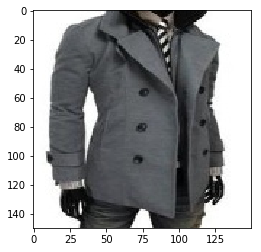

In [23]:
img = Image.open('./data/clothes_category_small/test/Coat/Coat.69.jpg')  # 불러올 이미지 경로
plt.imshow(img)

img = img.resize((150,150))
data = np.array(img)
data = data.astype('float')
data = data/255
data = data.reshape((1,150,150,3))


#result = np.argmax(data)

# var = list(training_set.class_indices.keys())   # y에 해당되는 값
# print(var)

result = model.predict_classes(data)
print(result)

print('--이 사진의 pattern 값--')
# print(var[result])



In [14]:
preds = model.predict(x)

ValueError: Error when checking : expected dense_27_input to have 2 dimensions, but got array with shape (1, 224, 224, 3)

In [2]:
img_path = './data/clothes_category_small/test/Coat/Coat.69.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [5]:
activations = activation_model.predict(img_tensor)
len(activations)

ValueError: Error when checking : expected dense_27_input to have 2 dimensions, but got array with shape (1, 150, 150, 3)

In [39]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


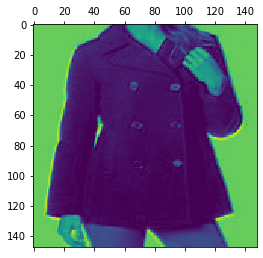

In [9]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

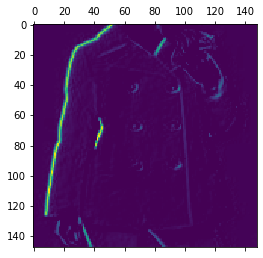

In [10]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

C:\Users\crboy\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


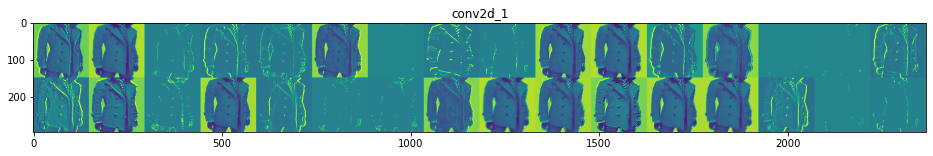

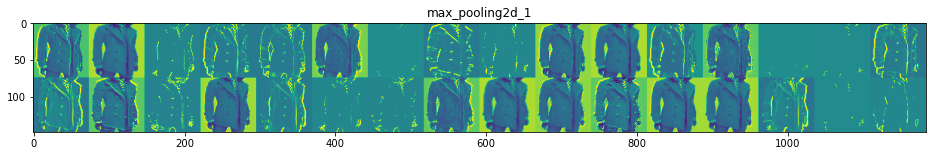

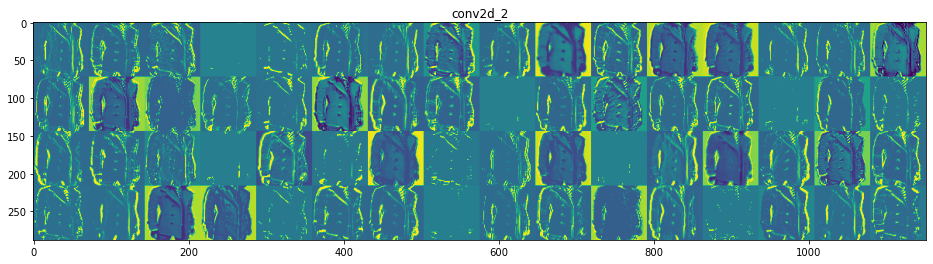

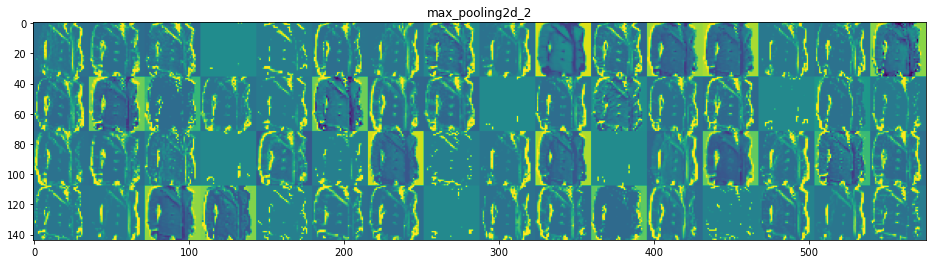

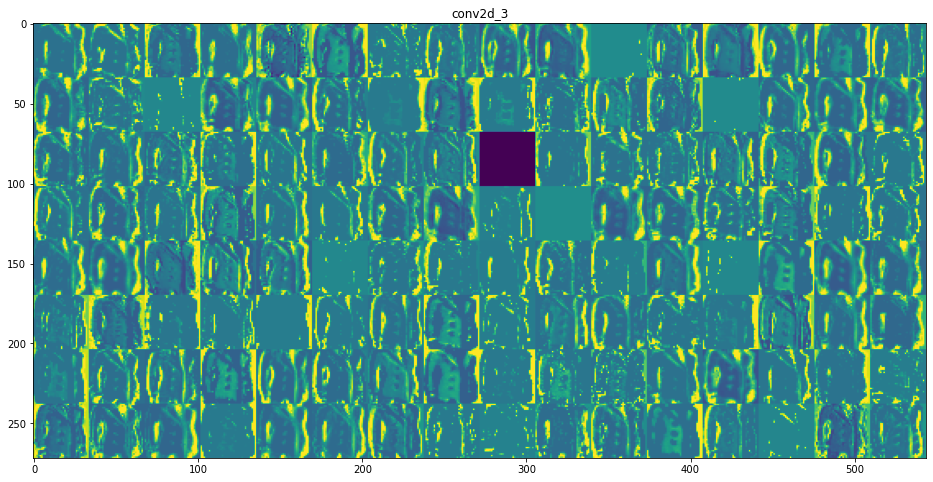

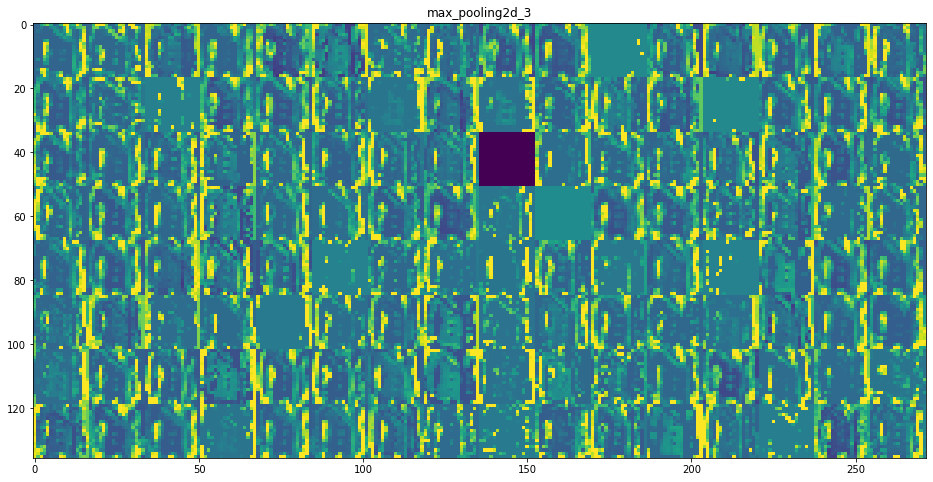

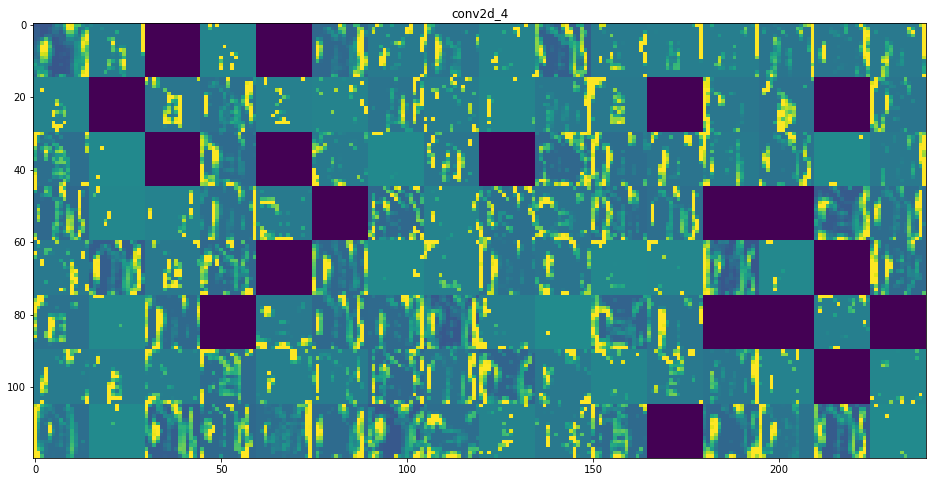

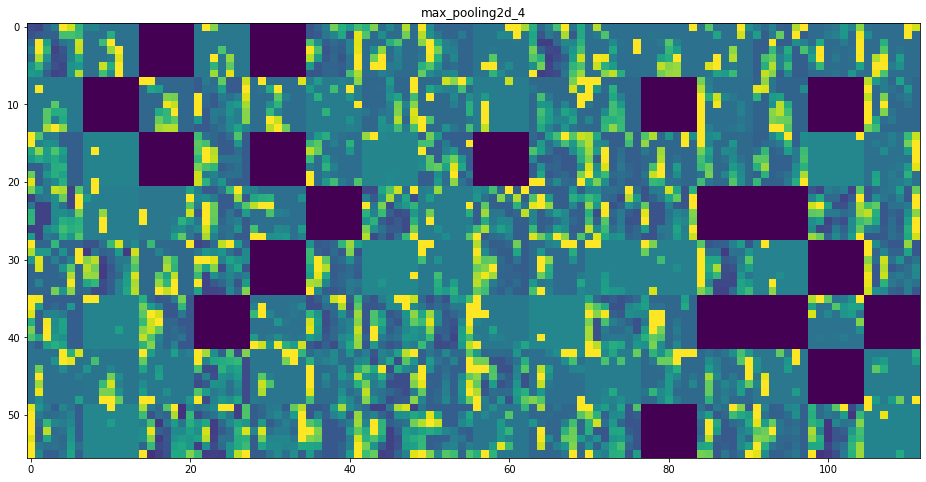

In [43]:
layer_names = []
for layer in model.layers[:8]:                         # 층의 이름을 그래프 제목으로 사용합니다
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):  # 특성맵을 그립니다.
    n_features = layer_activation.shape[-1]  # 특성맵에 있는 특성수
    
    size = layer_activation.shape[1] # 특성맵의 크기는 (1, size, size, n_features)
    
    n_cols = n_features // images_per_row  # 활성화 채널을 위한 그리드 크기를 구합니다.
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):     # 각 활성화를 하나의 큰 그리드에 채웁니다.
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
        
            channel_image -= channel_image.mean()     # 그래프로 나타내기 좋게 특성을 처리합니다.
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()